# Scoop Networks

In [1]:
from neuralnetwork import Network
from neuralnetwork.datasets import nregion
from neuralnetwork.activations import absolute, relu, sigmoid

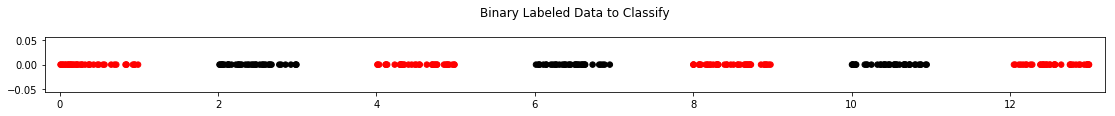

In [2]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_data(regions=7)
nregion.graph(X_train,Y_train)

In [3]:
len(C)

3

# Create Network

Layer: L0, Neurons: 1
Layer: L1, Neurons: 3, Weights: (3, 1), Biases: (3, 1)
Layer: L2, Neurons: 3, Weights: (3, 3), Biases: (3, 1)
Layer: L3, Neurons: 1, Weights: (1, 3), Biases: (1, 1)


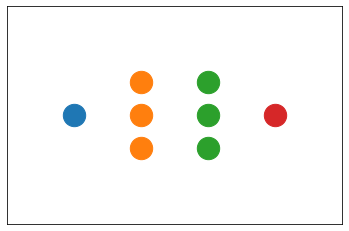

In [4]:
mynetwork = Network(1)
mynetwork.add_layer(number_of_neurons = 3 , activation=absolute)
mynetwork.add_layer(number_of_neurons = 3, activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

# Initialize Parameters

In [5]:
C = [1.0,1.1,1.3]

In [6]:
import numpy as np
# the slopes
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])

# the centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
# cutting off relationship connections
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
# the radii
mynetwork.layers['L2']['biases'] = np.array(R).reshape(mynetwork.layers['L2']['biases'].shape)+min(R)
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['biases'] = -min(R)


In [7]:
mynetwork.accuracy(X_train, Y_train)

0.49642857142857144

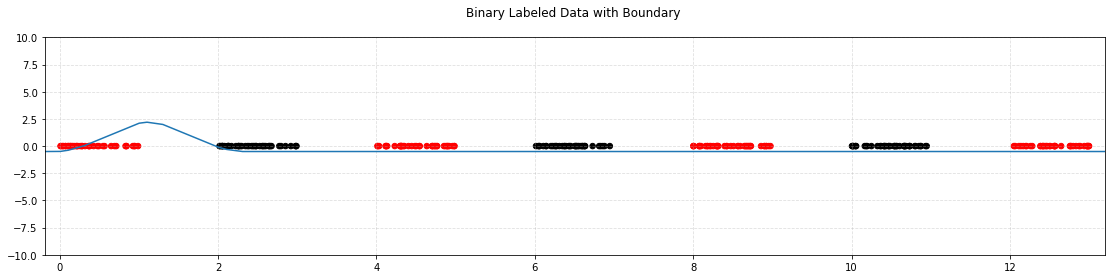

In [8]:
nregion.graph(X_train,Y_train, decision=mynetwork.decision)

# Train

In [12]:
mynetwork.train_biases_only()

In [10]:
mynetwork.train_all()

In [11]:
from neuralnetwork.optimizers import adam

In [20]:
num_epochs = 100
batch_size = 64
learning_rate=0.01
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = adam, beta = 0.9, regularization = "Scoop")

Loss:0.594860 Acc:0.714286 val_loss:0.601430 val_acc:0.714286: 100%|██████████| 100/100 [00:00<00:00, 355.31it/s]
Loss:0.594856 Acc:0.714286 val_loss:0.601387 val_acc:0.714286: 100%|██████████| 100/100 [00:00<00:00, 548.87it/s]
Loss:0.594859 Acc:0.714286 val_loss:0.601404 val_acc:0.714286: 100%|██████████| 100/100 [00:00<00:00, 538.06it/s]
Loss:0.594860 Acc:0.714286 val_loss:0.601430 val_acc:0.714286: 100%|██████████| 100/100 [00:00<00:00, 549.65it/s]
Loss:0.594856 Acc:0.714286 val_loss:0.601387 val_acc:0.714286: 100%|██████████| 100/100 [00:00<00:00, 545.58it/s]


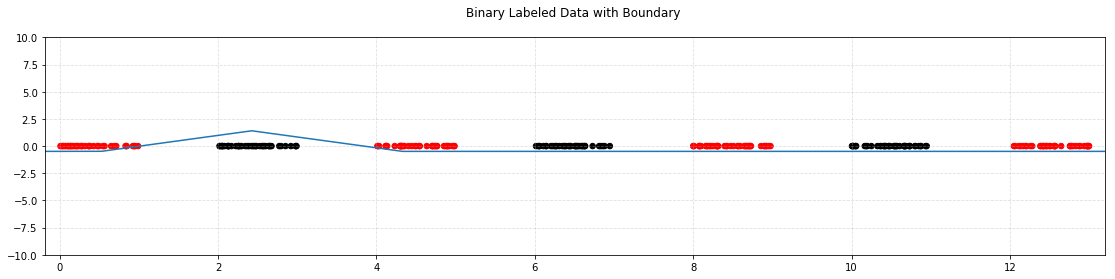

In [21]:
nregion.graph(X_train,Y_train, decision=mynetwork.decision)

In [22]:
mynetwork.binary_crossentropy_loss(X_train,Y_train, regularization="Scoop")

0.5948586841073107

In [23]:
mynetwork.binary_crossentropy_loss(X_train,Y_train)

0.5948586841073107

In [24]:
mynetwork.layers['L1']['weights']

array([[1.],
       [1.],
       [1.]])

In [25]:
#Centers
mynetwork.layers['L1']['biases']

array([[-3.16689949],
       [-3.29058767],
       [-2.42226097]])

In [26]:
mynetwork.layers['L2']['weights']

array([[-1., -0., -0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

In [27]:
#Radii
mynetwork.layers['L2']['biases']

array([[-1.16689949],
       [-1.08048355],
       [ 1.89822749]])

In [28]:
mynetwork.layers['L3']['weights']

array([[1., 1., 1.]])

In [29]:
mynetwork.layers['L3']['biases']

array([[-0.48715485]])

# Scoop Regularization

In [ ]:
centers = mynetwork.layers['L1']['biases']
radii = mynetwork.layers['L2']['biases']
dB = np.zeros_like(radii)

In [ ]:
tuples = [(i,j) for i in range(mynetwork.layers['L2']['biases'].shape[0]) for j in range(mynetwork.layers['L2']['biases'].shape[0]) if i < j]
tuples

In [ ]:
dB = np.zeros_like(radii)
for k in range(centers.shape[0]):
    sub_tuple = [j for j in tuples if k in j]
    for elem in sub_tuple:
        i, j = elem
        dB[k,0] += max(radii[i] + radii[j] - abs(centers[i] - centers[j]),0) 
dB

In [ ]:
grads = mynetwork.backward(X_train, Y_train, regularization = "Scoop")

In [ ]:
radii

In [ ]:
np.sign(-1)